In [2]:
from perceptron import PerceptronBinary, PerceptronOVR

In [3]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("mnist_train.csv", header= 0)
test_df  = pd.read_csv("mnist_test.csv", header= 0)

y_train = train_df.iloc[:, 0].values     
X_train = train_df.iloc[:, 1:].values    

y_test = test_df.iloc[:, 0].values          
X_test = test_df.iloc[:, 1:].values         

X_train = X_train.astype(np.float32) / 255.0
X_test  = X_test.astype(np.float32) / 255.0


In [4]:
print(train_df.shape)
print(test_df.shape)


(60000, 785)
(10000, 785)


In [5]:
# 过滤出 0 和 1
train_mask = (y_train == 0) | (y_train == 1)
test_mask  = (y_test  == 0) | (y_test  == 1)

X_train_bin = X_train[train_mask]
y_train_bin = y_train[train_mask]
X_test_bin  = X_test[test_mask]
y_test_bin  = y_test[test_mask]

# 把标签从 {0,1} 映射到 {-1, +1}，方便更新公式
y_train_bin = np.where(y_train_bin == 1, 1, -1)
y_test_bin  = np.where(y_test_bin  == 1, 1, -1)


In [6]:
ovr_clf = PerceptronOVR(
    n_classes=10,
    n_features=784,
    lr=0.001,
    n_epochs=3
)

ovr_clf.fit(X_train, y_train)

y_pred = ovr_clf.predict(X_test)
accuracy = (y_pred == y_test).mean()
print("Test accuracy:", accuracy)


Training classifier for class 0 vs rest
Epoch 1/3, errors = 1044
Epoch 2/3, errors = 804
Epoch 3/3, errors = 764

Training classifier for class 1 vs rest
Epoch 1/3, errors = 1005
Epoch 2/3, errors = 818
Epoch 3/3, errors = 765

Training classifier for class 2 vs rest
Epoch 1/3, errors = 2341
Epoch 2/3, errors = 2033
Epoch 3/3, errors = 2004

Training classifier for class 3 vs rest
Epoch 1/3, errors = 2807
Epoch 2/3, errors = 2451
Epoch 3/3, errors = 2496

Training classifier for class 4 vs rest
Epoch 1/3, errors = 1997
Epoch 2/3, errors = 1691
Epoch 3/3, errors = 1638

Training classifier for class 5 vs rest
Epoch 1/3, errors = 3097
Epoch 2/3, errors = 2725
Epoch 3/3, errors = 2615

Training classifier for class 6 vs rest
Epoch 1/3, errors = 1454
Epoch 2/3, errors = 1253
Epoch 3/3, errors = 1212

Training classifier for class 7 vs rest
Epoch 1/3, errors = 1713
Epoch 2/3, errors = 1488
Epoch 3/3, errors = 1532

Training classifier for class 8 vs rest
Epoch 1/3, errors = 4260
Epoch 2/3,

In [7]:
n_features = X_train_bin.shape[1]
perc = PerceptronBinary(n_features=n_features, lr=0.01, n_epochs=10)

perc.fit(X_train_bin, y_train_bin)

# 在测试集上评估
y_pred_test = perc.predict(X_test_bin)
accuracy = np.mean(y_pred_test == y_test_bin)
print("Binary Perceptron accuracy (0 vs 1):", accuracy)


Epoch 1/10, errors = 45
Epoch 2/10, errors = 23
Epoch 3/10, errors = 17
Epoch 4/10, errors = 12
Epoch 5/10, errors = 15
Epoch 6/10, errors = 11
Epoch 7/10, errors = 9
Epoch 8/10, errors = 12
Epoch 9/10, errors = 8
Epoch 10/10, errors = 8
Binary Perceptron accuracy (0 vs 1): 0.9990543735224586


In [8]:
# 为了加快调试，先取 10000 条
n_train_subset = 10000
X_train_sub = X_train[:n_train_subset]
y_train_sub = y_train[:n_train_subset]

ovr_clf = PerceptronOVR(n_classes=10, n_features=784, lr=0.001, n_epochs=3)
ovr_clf.fit(X_train_sub, y_train_sub)

y_test_pred = ovr_clf.predict(X_test)
accuracy = np.mean(y_test_pred == y_test)
print("Multiclass Perceptron accuracy (subset trained):", accuracy)



Training classifier for class 0 vs rest
Epoch 1/3, errors = 235
Epoch 2/3, errors = 152
Epoch 3/3, errors = 131

Training classifier for class 1 vs rest
Epoch 1/3, errors = 228
Epoch 2/3, errors = 151
Epoch 3/3, errors = 155

Training classifier for class 2 vs rest
Epoch 1/3, errors = 484
Epoch 2/3, errors = 376
Epoch 3/3, errors = 343

Training classifier for class 3 vs rest
Epoch 1/3, errors = 569
Epoch 2/3, errors = 429
Epoch 3/3, errors = 417

Training classifier for class 4 vs rest
Epoch 1/3, errors = 394
Epoch 2/3, errors = 308
Epoch 3/3, errors = 269

Training classifier for class 5 vs rest
Epoch 1/3, errors = 586
Epoch 2/3, errors = 466
Epoch 3/3, errors = 393

Training classifier for class 6 vs rest
Epoch 1/3, errors = 313
Epoch 2/3, errors = 222
Epoch 3/3, errors = 180

Training classifier for class 7 vs rest
Epoch 1/3, errors = 362
Epoch 2/3, errors = 253
Epoch 3/3, errors = 271

Training classifier for class 8 vs rest
Epoch 1/3, errors = 811
Epoch 2/3, errors = 652
Epoch 3

In [9]:
from mlp import SimpleMLP

In [10]:
# 创建 MLP 模型
mlp = SimpleMLP(
    input_dim=784,
    hidden_dim=512,   # ★ 从 128 增到 512
    output_dim=10,
    lr=0.005
)


# 训练模型
mlp.train(X_train, y_train, epochs=10, batch_size=64)

# 测试集评估
y_pred = mlp.predict(X_test)
test_acc = (y_pred == y_test).mean()
print("Test accuracy:", test_acc)


NameError: name 'relu_grad' is not defined

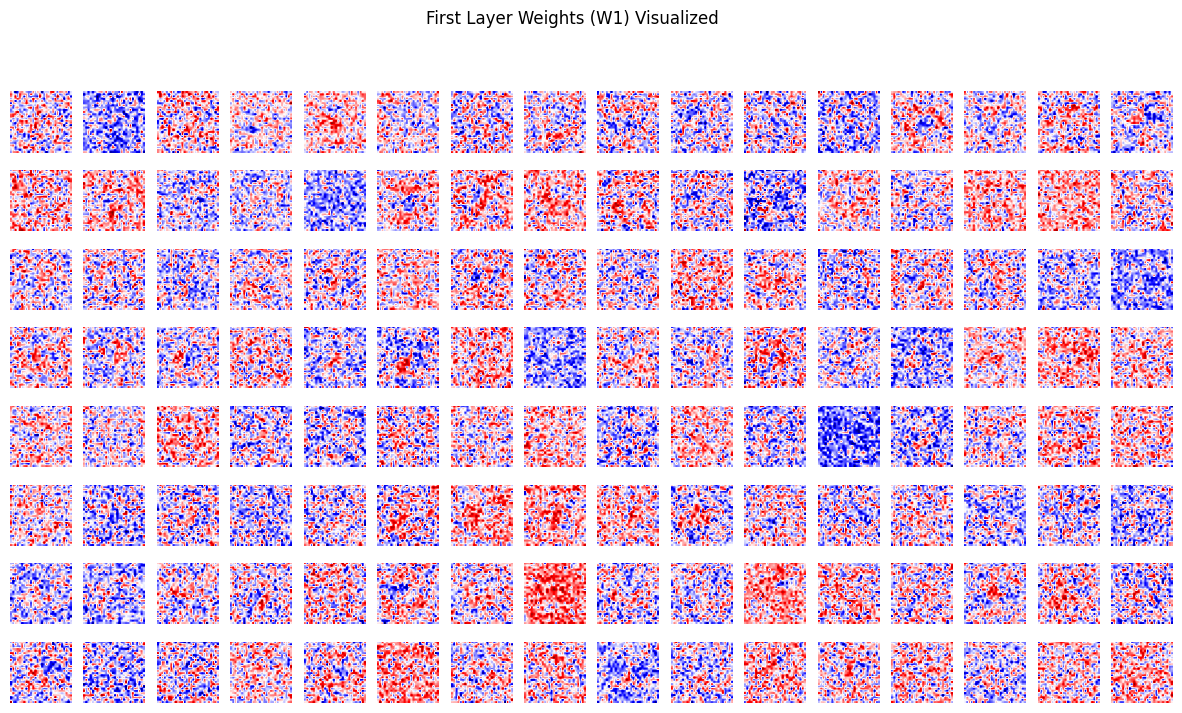

In [ ]:
#visualization 
import matplotlib.pyplot as plt

W1 = mlp.W1   # shape (784, 128)

fig, axes = plt.subplots(8, 16, figsize=(15, 8))
axes = axes.ravel()

for i in range(128):
    weight_img = W1[:, i].reshape(28, 28)
    axes[i].imshow(weight_img, cmap='seismic')
    axes[i].axis('off')

plt.suptitle("First Layer Weights (W1) Visualized")
plt.show()


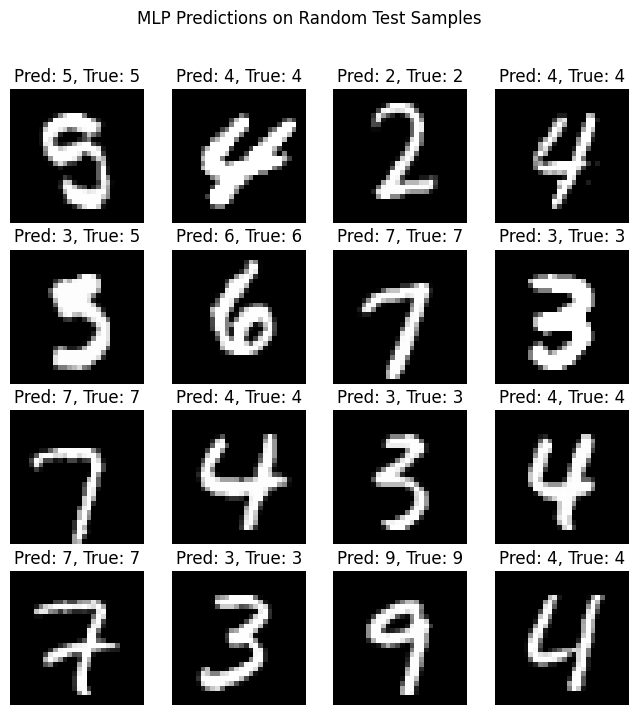

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.choice(len(X_test), 16, replace=False)
images = X_test[idx]
labels = y_test[idx]
preds = mlp.predict(images)

fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {preds[i]}, True: {labels[i]}")
    ax.axis('off')

plt.suptitle("MLP Predictions on Random Test Samples")
plt.show()
